<a href="https://colab.research.google.com/github/julopezrio/SYS/blob/main/ejercicios_noteebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$x(t)=200cos(100t)−50sin(200t+5)$



*   Repetir según ejemplo
*   Repetir para entrada de -3.3 a 3.3 con conversor de 4 bits

In [101]:
import numpy as np # importar libreria numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

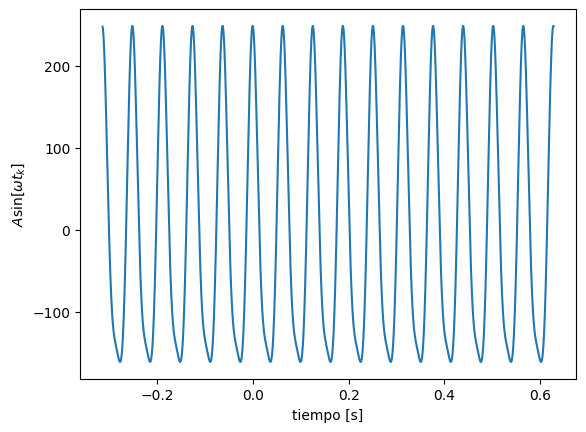

In [102]:
#describir señal

k=500 # numero de muestras

#parametros funcion 1
T1=(2*3.1416)/100
f1=1/T1
A1=200

#parametros funcion 2
T2=(2*3.1416)/200
f2=1/T2
A2=50
p2=5 #desfase

Fs=100*max(f1,f2) # frecuecia de muestre que tiene que cumplir el teorema de nyquist
ts=1/Fs
ti=-10*min(T1,T2) # tiempo inicial
tf=10*max(T1,T2) # tiempo final

tv = np.arange(ti,tf,ts)


#tb=np.linspace(ti,tf,k) # vector de tiempo

fun1=A1*np.cos(2*np.pi*f1*tv)
fun2=A2*np.sin(2*np.pi*f2*tv+p2)

xv=fun1-fun2

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

Discretizacion

In [103]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

ycs = my_ceropen(xv,ymin=-3.3,ymax=3.3)

In [104]:
#cuantizacion
nbits = 4
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits)

dn = cdist(ycs.reshape(-1,1),ve.reshape(-1,1))
dn.shape

ind=np.argmin(dn,axis=1)
ind


print(ycs[1],ind[1],ve[ind[1]])

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))


3.266416844859455 15 3.3


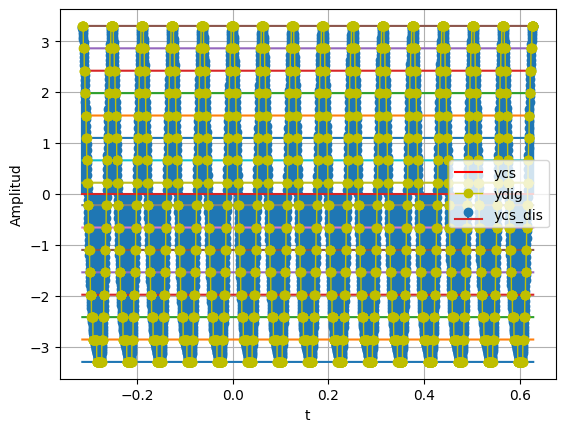

In [105]:
plt.plot(tv,ycs,c='r',label='ycs')#cs continua

plt.stem(tv,ycs,label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=1)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()